# Descriptive Statistics
is a branch of statistics that involves the collection, organization, summarization, and presentation of data. It is used to describe the basic features of the data in a study. It provides simple summaries about the sample and the measures.

## Data Types

| Data | Type | Description | Example |
| --- | --- | --- | --- |
| Quantitative | Discrete | Can only take specific values | Number of cars sold each day **(1, 2, 3, etc.)** |
| Quantitative | Continuous | Can take any value within a given range | Amount of rainfall in a city over a year, in millimeters **(25.4 mm, 50.8 mm, etc.)** |
| Qualitative | Nominal | Represent categories without any intrinsic ordering | Blood types of individuals in a study **(A, B, AB, O)** |
| Qualitative | Ordinal | Represent categories with a meaningful order or ranking | Educational level of respondents in a survey **(High School, Bachelor's, Master's, Ph.D.)** |

In [ ]:
discrete_data = {
    "day": [1, 2, 3],
    "cars_sold": [1, 2, 3]
}

continuous_data = {
    "day": [1, 2, 3],
    "rainfall": [25.4, 50.8, 27.3]
}

nominal_data = {
    "patient_id": [1, 2, 3, 4, 5, 6],
    "blood_type": ["A", "B", "O", "AB", "A", "B"]
}

ordinal_data = {
    "respondent_id": [1, 2, 3, 4, 5, 6],
    "education_level": ["high school", "bachelor's", "master's", "high school", "bachelor's", "PhD"]
}

## Measures of Central Tendency


| Property | Mean | Median | Mode |
|----------|------|--------|------|
| **Formula** | $\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$ | $\tilde{x} = x_{\frac{n+1}{2}}$ or $\tilde{x} = \frac{x_{\frac{n}{2}} + x_{\frac{n}{2}+1}}{2}$ | $Mode = max(X)$ |

In [ ]:
def mean(data: list) -> float:
    return sum(data) / len(data)

def median(data: list) -> float:
    data.sort()
    length = len(data)
    if length % 2 == 0:
        return (data[length // 2 - 1] + data[length // 2]) / 2
    else:
        return data[length // 2]
    
def mode(data: list) -> float:
    counts = {}
    for value in data:
        if value in counts:
            counts[value] += 1
        else:
            counts[value] = 1
    return max(counts, key=counts.get)

## Measures of Dispersion (Variability)

| Property | Formula |
|----------|---------|
| **Range** | $Range = max(x) - min(x)$ |
| **Variance** | $\sigma^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}$ |
| **Standard Deviation** | $\sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}$ |
| **Interquartile Range (IQR)** | $IQR = Q3 - Q1$ |

In [ ]:
def range(data: list) -> float:
    return max(data) - min(data)

def variance(data: list) -> float:
    mean = sum(data) / len(data)
    return sum([(x - mean)**2 for x in data]) / (len(data) - 1)

def standard_deviation(data: list) -> float:
    mean = sum(data) / len(data)
    return (sum([(x - mean)**2 for x in data]) / (len(data) - 1))**0.5

def quartiles(data: list) -> list:
    data.sort()
    length = len(data)
    if length % 2 == 0:
        lower_half = data[:length // 2]
        upper_half = data[length // 2:]
    else:
        lower_half = data[:length // 2]
        upper_half = data[length // 2 + 1:]
    return (median(lower_half), median(data), median(upper_half))

def interquartile_range(data: list) -> float:
    lower_quartile, _, upper_quartile = quartiles(data)
    return upper_quartile - lower_quartile

## Measures of Shape

| Property | Formula |
|----------|---------|
| **Skewness** | $sk = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^3}{n \cdot \sigma^3}$ |
| **Kurtosis** | $kt = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^4}{n \cdot \sigma^4}$ |

In [ ]:
def skewness(data: list) -> float:
    mean = sum(data) / len(data)
    variance = sum([(x - mean)**2 for x in data]) / (len(data) - 1)
    std_dev = variance**0.5
    return sum([(x - mean)**3 for x in data]) / (len(data) * std_dev**3)

def kurtosis(data: list) -> float:
    mean = sum(data) / len(data)
    variance = sum([(x - mean)**2 for x in data]) / (len(data) - 1)
    std_dev = variance**0.5
    return sum([(x - mean)**4 for x in data]) / (len(data) * std_dev**4)

## Data Visualization

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./assets/sales_data_sample.csv")

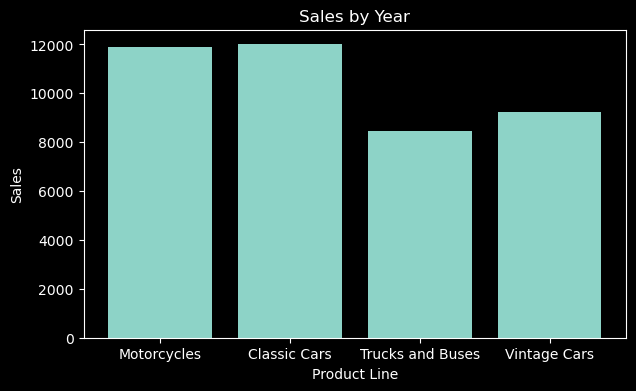

In [33]:
# Bar chart
plt.figure(figsize=(7, 4))
plt.bar(df["PRODUCTLINE"], df["SALES"])
plt.xlabel("Product Line")
plt.ylabel("Sales")
plt.title("Sales by Year")
plt.show()

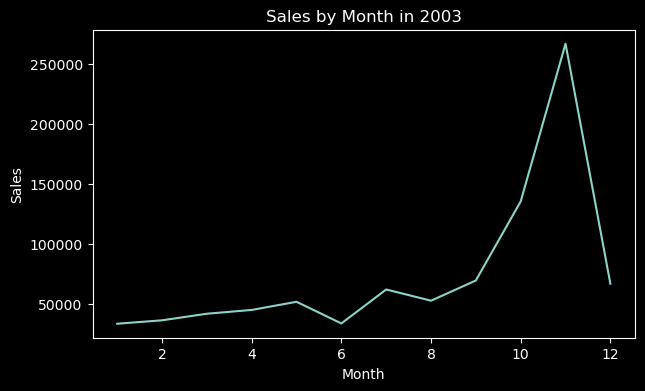

In [51]:
# Line chart
sales_of_2003 = df[df["YEAR_ID"] == 2003]
sales_grouped_by_month = sales_of_2003.groupby("MONTH_ID").sum()

plt.figure(figsize=(7, 4))
plt.plot(sales_grouped_by_month.index, sales_grouped_by_month["SALES"])
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Sales by Month in 2003")
plt.show()

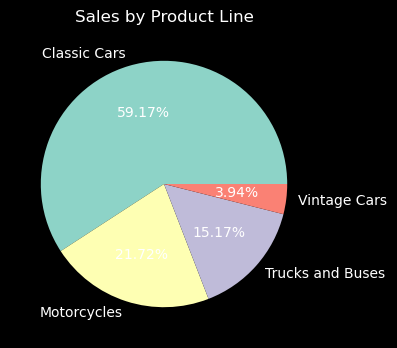

In [60]:
# Pie chart
sales_grouped_by_product_line = df.groupby("PRODUCTLINE").sum()

plt.figure(figsize=(7, 4))
plt.pie(sales_grouped_by_product_line["SALES"], labels=sales_grouped_by_product_line.index, autopct="%1.2f%%")
plt.title("Sales by Product Line")
plt.show()

Text(0.5, 1.0, 'Sales Distribution')

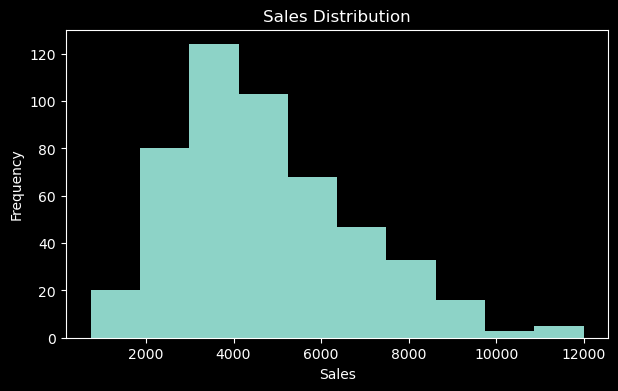

In [69]:
# Histogram
plt.figure(figsize=(7, 4))
plt.hist(df["SALES"], bins=10)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Sales Distribution")

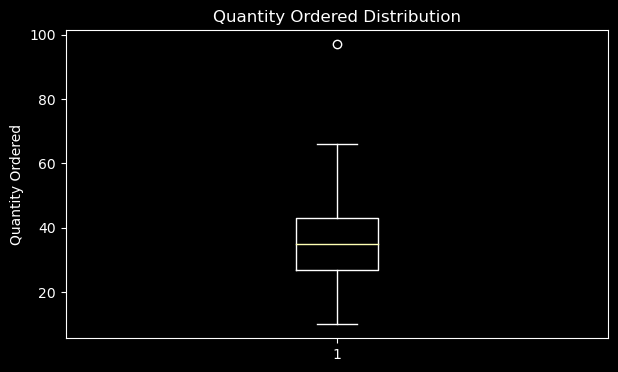

In [72]:
# Box plot
plt.figure(figsize=(7, 4))
plt.boxplot(df["QUANTITYORDERED"])
plt.ylabel("Quantity Ordered")
plt.title("Quantity Ordered Distribution")
plt.show()

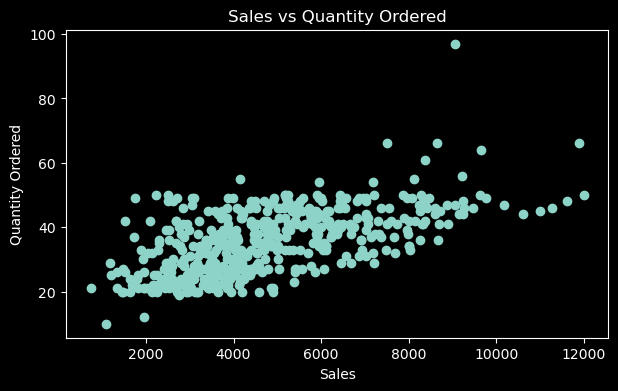

In [71]:
# Scatter plot
plt.figure(figsize=(7, 4))
plt.scatter(df["SALES"], df["QUANTITYORDERED"])
plt.xlabel("Sales")
plt.ylabel("Quantity Ordered")
plt.title("Sales vs Quantity Ordered")
plt.show()